Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução à Teoria de Vibrações



# Trabalho 1


### Aluna: Caroline Molin do Amaral (Matrícula: 00312125)

### Professor Dr. Marcelo Maia Rocha 
---


## Sumário

[1.   Introdução](#section_1)  
[2.   Características do Sistema](#section_2)  
[3.   Importação dos Dados](#section_3)  
[4.   Cálculo dos Deslocamentos](#section_4)  
[5.   Pseudo-espectro da Aceleração](#section_5)  
[6.   Periodograma](#section_6)  
[7.   Considerações Finais](#section_7)  




In [1]:
# Importação das bibliotecas requeridas para a realização do presente trabalho

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 1. Introdução <a name="section_1"></a> 

O presente trabalho tem por finalidade a avaliação do comportamento de um sistema com um grau de liberdade (SDOF - Single Degree of Freedom) sujeito à uma excitação na base. Para a obtenção dos dados de aceleração necessários para a realização deste experimento, utilizou-se o aplicativo de celular "iNVH" da empresa Bosch, o qual viabiliaza a captação de vibrações por meio de microfones e acelerômetros embutidos. Assim, a partir dos dados de aceleração nos eixos coordenados coletados, serão apresentados o cálculo dos deslocamentos por meio da Integral de Duhamel e a construção dos gráficos de pseudo-espectro da aceleração e periodograma, a fim de avaliar a resposta do sistema em questão.     



## 2. Características do Sistema <a name="section_2"></a> 




In [2]:
m  = 2.0       # massa do sistema em kg (arbitrada)
fn = np.linspace(0.1,10,1000)   # frequência natural em Hz
Tn = 1/fn      # período
zt = 0.01      # amortecimento
u0 = 0.        # deslocamento inicial
v0 = 0.        # velocidade inicial


## 3. Importação dos Dados <a name="section_3"></a> 


O aplicativo de celular da empresa Bosch "iNVH" foi utilizado para medir a aceleração de uma batedeira convencional em funcionamento, durante um curto período de tempo. Os dados coletados pelo aplicativo foram então exportados em um arquivo ".csv". Na sequência, verifica-se a importação deste arquivo para ser interpretado pela biblioteca ```MRPy```.

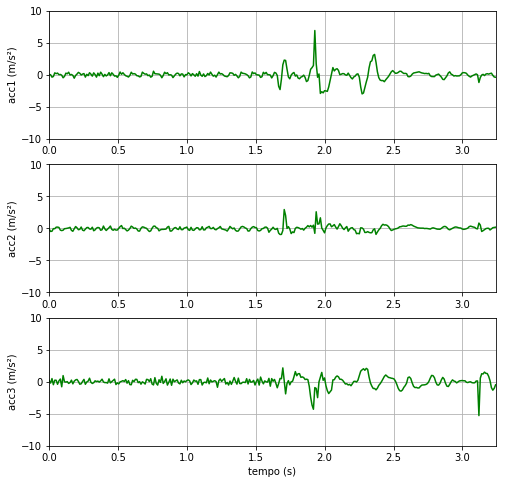

In [3]:
data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(1, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc, color='green')

    plt.xlim(0, data.Td);   
    plt.ylim(-10, 10);
    plt.ylabel('acc{0} (m/s²)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('tempo (s)');


A seguir, pode ser observada a vibração na direção vertical (eixo coordenado z):


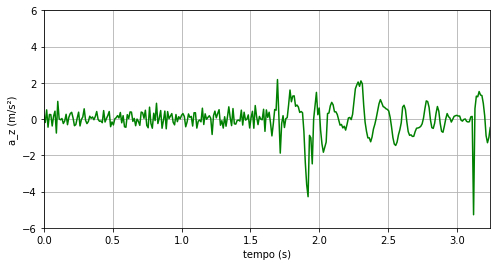

In [4]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, az[0], color='green')

plt.xlim(0, az.Td)
plt.ylim(-6, 6)
plt.xlabel('tempo (s)')
plt.ylabel('a_z (m/s²)') 

plt.grid(True) 


## 4. Cálculo dos Deslocamentos <a name="section_4"></a> 


A integral de Duhamel, apresentada na sequência, permite a obtenção de uma solução numérica para sistemas lineares e se baseia na superposição das respostas de um sistema à uma sequência de impulsos. 


$$ u(t) = u_0(t) + \frac{1}{m \omega_{\rm D}} 
                   \int_0^t \exp \left[ -\zeta\omega_{\rm n}(t - \tau) \right] \;
                   \sin \omega_{\rm D} (t - \tau) \; F(\tau) \; d\tau $$

onde $u_0(t)$ é a resposta do sistema às condições iniciais.

É possível utilizar esse princípio na biblioteca ```MRPy``` para a obtenção dos deslocamentos máximos para cada uma das frequências definidas, conforme descrito a seguir:

In [5]:
u_max = np.zeros(fn.shape)

# função para cálculo do u_Dx realizado para cada item em fn
def get_u_dx(f):
    return az.sdof_Duhamel(f,zt, u0, v0)/m
    
for k, f in enumerate (fn):    
    u_Dx = get_u_dx(f)
    u_max[k] = u_Dx.max()
    
wn = (2*np.pi*fn) #cálculo da frequência 


## 5. Pseudo-espectro da Aceleração  <a name="section_5"></a> 

Este tipo de gráfico consiste em um espectro de resposta das acelerações do sistema, ou seja, relaciona as acelerações de pico (acelerações máximas) com o período. A aceleração de pico é obtida através da seguinte equação:

$$ a_p = w_n² * u_m  $$

Aceleração de pico máxima 7.758172725158064 m/s²


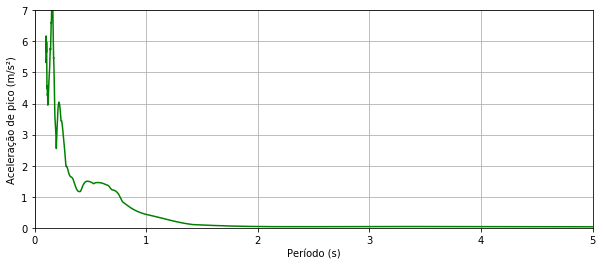

In [6]:
aceleracao_pico = np.square(wn)*u_max #cálculo da aceleração de pico

plt.figure(3, figsize=(10,4), clear = True)
plt.plot(Tn,aceleracao_pico, 'b', color='green')
plt.xlim(0,5)
plt.xlabel('Período (s)')
plt.ylim(0,7)
plt.ylabel('Aceleração de pico (m/s²)')
plt.grid(True)
print('Aceleração de pico máxima', max(aceleracao_pico), 'm/s²')


## 6. Periodograma <a name="section_6"></a> 

Um periodograma representa a densidade espectral como função da frequência do sistema. Assim, este tipo de gráfico permite observar a maior frequência, a qual se aproxima do valor de frequência natural de vibração do sistema. Através da função contida na biblioteca ```MRPy```, foi possível obter um periodograma para os dados de entrada (acelerações) e outro para os dados de saída (após a Integral de Duhamel). O periodograma para os valores verticais da aceleração pode ser visualizado na sequência:

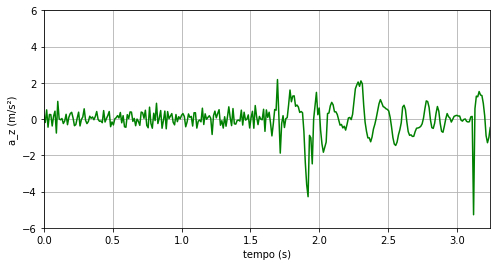

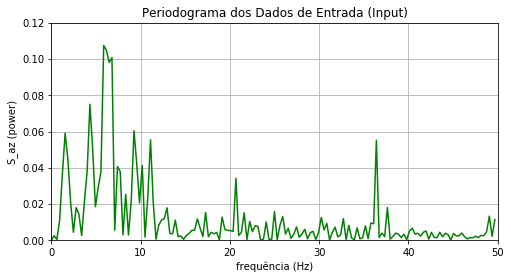

In [7]:
plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(t, az[0], color='green')

plt.xlim(0, az.Td);  
plt.ylim(-6, 6);
plt.xlabel('tempo (s)') 
plt.ylabel('a_z (m/s²)') 

plt.grid(True) 

# aplicando o método para cálculo e visualização do periodograma input

Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.title('Periodograma dos Dados de Entrada (Input)')
plt.plot(f, Saz[0], color='green')

plt.xlim(0, 50);    
plt.ylim(0,  0.12); 
plt.xlabel('frequência (Hz)')
plt.ylabel('S_az (power)') 

plt.grid(True) 



Utilizando o mesmo procedimento, obtem-se o periodograma de dados de saída, apresentado na sequência:   

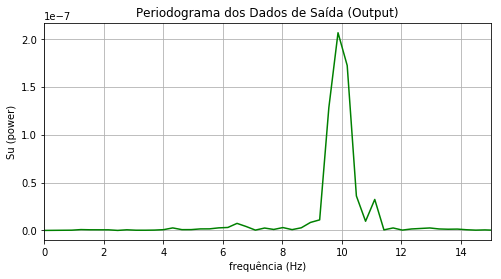

In [8]:
# aplicando o método para cálculo e visualização do periodograma output

Su_Dx, fs = u_Dx.periodogram()
f       = u_Dx.f_axis()

plt.figure(6, figsize=(8, 4), clear=True)
plt.title('Periodograma dos Dados de Saída (Output)')
plt.plot(f, Su_Dx[0], color='green')

plt.xlim(0, 15);    
plt.xlabel('frequência (Hz)')
plt.ylabel('Su (power)') 

plt.grid(True)


## 7. Considerações Finais <a name="section_7"></a> 


A realização deste trabalho viabilizou a melhor compreensão de alguns conceitos apresentados ao longo da matéria de Introdução à Teoria de Vibrações. Após a coleta dos dados de aceleração da batedeira convencional em funcionamento, por meio do recurso "iNVH", utilizaram-se apenas as informações referentes ao eixo coordenado z, configurando um sistema com um grau de liberdade. A partir disso, utilizando as funções disponíveis na biblioteca ```MRPy```, foi possível calcular os máximos deslocamentos para os valores de frequência natural definidos inicialmente, os quais, multiplicados pelo quadrado de "wn" viabilizou a construção do pseudo-espectro da aceleração, por meio do qual verificou-se uma aceleração de pico máxima de 7,76 m/s². Finalmente, por meio da confecção do periodograma do sistema, foi possível observar uma das frequências naturais de vibração do sistema, de aproximadamente 6 Hz. 